__UK POPULATION FORECAST__

In [1]:
#importing packages
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
import numpy as np
np.float_ = np.float64

[ONS UK Populations estimates dataset](https://www.ons.gov.uk/file?uri=/peoplepopulationandcommunity/populationandmigration/populationestimates/datasets/populationestimatestimeseriesdataset/current/pop.csv)

In [2]:
#loading the dataset
pop = pd.read_csv("pop.csv")
pop.head(10)

,Title,Scotland population mid-year estimate,Great Britain population mid-year estimate,England population mid-year estimate,England and Wales population mid-year estimate,United Kingdom population mid-year estimate,Northern Ireland population mid-year estimate,Wales population mid-year estimate
0,CDID,SCPOP,GBPOP,ENPOP,EWPOP,UKPOP,NIPOP,WAPOP
1,PreUnit,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Unit,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Release Date,15-07-2024,15-07-2024,15-07-2024,15-07-2024,15-07-2024,15-07-2024,15-07-2024
4,Next release,To be announced,To be announced,To be announced,To be announced,To be announced,To be announced,To be announced
5,Important Notes,NaN,NaN,NaN,NaN,[Mid-year population estimates relate to the u...,NaN,NaN
6,1971,5235600,54387600,46411700,49152000,55928000,1540400,2740300
7,1972,5230600,54557700,46571900,49327100,56096700,1539000,2755200
8,1973,5233900,54692900,46686200,49459000,56222900,1530000,2772800
9,1974,5240800,54708700,46682700,49467900,56235600,1526900,2785200


In [3]:
#Cleaning the dataset: Eliminating unwanted columns
pop_df = pop.iloc[6:58]
final_df = pop_df.drop(pop_df.columns[[2,4,5]], axis=1)
final_df.columns = ['Year' , 'Scotland' ,'England', 'Northern Ireland', 'Wales']

In [4]:
final_df['Year'] = pd.to_datetime(final_df['Year'], format='%Y')
final_df.set_index('Year')

,Scotland,England,Northern Ireland,Wales
Year,,,,
1971-01-01,5235600,46411700,1540400,2740300
1972-01-01,5230600,46571900,1539000,2755200
1973-01-01,5233900,46686200,1530000,2772800
1974-01-01,5240800,46682700,1526900,2785200
1975-01-01,5232400,46674400,1523500,2795400
1976-01-01,5233400,46659900,1523500,2799300
1977-01-01,5226200,46639800,1523300,2800600
1978-01-01,5212300,46638200,1523200,2804300
1979-01-01,5203600,46698100,1528300,2810100


In [5]:
final_df[['England', 'Wales', 'Scotland', 'Northern Ireland']] = final_df[['England', 'Wales', 'Scotland', 'Northern Ireland']].astype(float)
final_df.set_index('Year')

,Scotland,England,Northern Ireland,Wales
Year,,,,
1971-01-01,5235600.0,46411700.0,1540400.0,2740300.0
1972-01-01,5230600.0,46571900.0,1539000.0,2755200.0
1973-01-01,5233900.0,46686200.0,1530000.0,2772800.0
1974-01-01,5240800.0,46682700.0,1526900.0,2785200.0
1975-01-01,5232400.0,46674400.0,1523500.0,2795400.0
1976-01-01,5233400.0,46659900.0,1523500.0,2799300.0
1977-01-01,5226200.0,46639800.0,1523300.0,2800600.0
1978-01-01,5212300.0,46638200.0,1523200.0,2804300.0
1979-01-01,5203600.0,46698100.0,1528300.0,2810100.0


In [6]:
final_df.set_index('Year', inplace=True)

In [7]:
df_pop_England=final_df[['England']]
df_pop_Wales=final_df[['Wales']]
df_pop_Scotland=final_df[['Scotland']]
df_pop_NI=final_df[['Northern Ireland']]

In [8]:
df_prophet_England = df_pop_England.reset_index()
df_prophet_England.columns = ['ds', 'y']

df_prophet_Wales = df_pop_Wales.reset_index()
df_prophet_Wales.columns = ['ds', 'y']

df_prophet_Scotland = df_pop_Scotland.reset_index()
df_prophet_Scotland.columns = ['ds', 'y']

df_prophet_NI = df_pop_NI.reset_index()
df_prophet_NI.columns = ['ds', 'y']

In [9]:
#Create and fit the model
model_England = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
model_England.fit(df_prophet_England)
model_Wales = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
model_Wales.fit(df_prophet_Wales)
model_Scotland = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
model_Scotland.fit(df_prophet_Scotland)
model_NI = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
model_NI.fit(df_prophet_NI)

23:56:12 - cmdstanpy - INFO - Chain [1] start processing
23:56:12 - cmdstanpy - INFO - Chain [1] done processing
23:56:13 - cmdstanpy - INFO - Chain [1] start processing
23:56:13 - cmdstanpy - INFO - Chain [1] done processing
23:56:13 - cmdstanpy - INFO - Chain [1] start processing
23:56:14 - cmdstanpy - INFO - Chain [1] done processing
23:56:15 - cmdstanpy - INFO - Chain [1] start processing
23:56:15 - cmdstanpy - INFO - Chain [1] done processing


In [10]:
#Make predictions for 10 years ahead
future_England = model_England.make_future_dataframe(periods=10*365)  
forecast_England = model_England.predict(future_England)
future_Wales= model_Wales.make_future_dataframe(periods=10*365)
forecast_Wales = model_Wales.predict(future_Wales)
future_Scotland = model_Scotland.make_future_dataframe(periods=10*365)
forecast_Scotland = model_Scotland.predict(future_Scotland)
future_NI = model_NI.make_future_dataframe(periods=10*365)  # Predict for 10 years ahead
forecast_NI = model_NI.predict(future_NI)

In [11]:
X = np.arange(len(df_pop_England))
Y = df_pop_England['England'].values
slope, intercept = np.polyfit(X, Y, 1)

X = np.arange(len(df_pop_Wales))
Y = df_pop_Wales['Wales'].values
slope, intercept = np.polyfit(X, Y, 1)

X = np.arange(len(df_pop_Scotland))
Y = df_pop_Scotland['Scotland'].values
slope, intercept = np.polyfit(X, Y, 1)

X = np.arange(len(df_pop_NI))
Y = df_pop_NI['Northern Ireland'].values
slope, intercept = np.polyfit(X, Y, 1)

In [12]:
#Group predictions by year
yearly_forecast_England = forecast_England.groupby(forecast_England['ds'].dt.year).agg({
'yhat': 'first',
'yhat_lower': 'min',
'yhat_upper': 'max'
}).reset_index()

yearly_forecast_Wales = forecast_Wales.groupby(forecast_Wales['ds'].dt.year).agg({
'yhat': 'first',
'yhat_lower': 'min',
'yhat_upper': 'max'
}).reset_index()

yearly_forecast_Scotland = forecast_Scotland.groupby(forecast_Scotland['ds'].dt.year).agg({
'yhat': 'first',
'yhat_lower': 'min',
'yhat_upper': 'max'
}).reset_index()

yearly_forecast_NI = forecast_NI.groupby(forecast_NI['ds'].dt.year).agg({
'yhat': 'first',
'yhat_lower': 'min',
'yhat_upper': 'max'
}).reset_index()

In [13]:
yearly_forecast_England.columns = ['Year', 'England_Predicted_Population', 'Lower_Bound', 'Upper_Bound']
yearly_forecast_England['ctry19cd'] = 'E92000001'
print(yearly_forecast_England.head())
yearly_forecast_Wales.columns = ['Year', 'Wales_Predicted_Population', 'Lower_Bound', 'Upper_Bound']
yearly_forecast_Wales['ctry19cd'] = 'W92000004'
print(yearly_forecast_Wales.head())
yearly_forecast_Scotland.columns = ['Year', 'Scotland_Predicted_Population', 'Lower_Bound', 'Upper_Bound']
yearly_forecast_Scotland['ctry19cd'] = 'S92000003'
yearly_forecast_NI.columns = ['Year', 'Northern_Ireland_Predicted_Population', 'Lower_Bound', 'Upper_Bound']
yearly_forecast_NI['ctry19cd'] = 'N92000002'

   Year  England_Predicted_Population   Lower_Bound   Upper_Bound   ctry19cd
0  1971                  4.648347e+07  4.637131e+07  4.657713e+07  E92000001
1  1972                  4.655275e+07  4.645241e+07  4.665685e+07  E92000001
2  1973                  4.661259e+07  4.650253e+07  4.672182e+07  E92000001
3  1974                  4.663901e+07  4.652830e+07  4.674224e+07  E92000001
4  1975                  4.665850e+07  4.654500e+07  4.675962e+07  E92000001
   Year  Wales_Predicted_Population   Lower_Bound   Upper_Bound   ctry19cd
0  1971                2.741300e+06  2.735610e+06  2.747202e+06  W92000004
1  1972                2.757411e+06  2.751874e+06  2.763368e+06  W92000004
2  1973                2.771520e+06  2.765884e+06  2.777282e+06  W92000004
3  1974                2.785215e+06  2.779454e+06  2.790830e+06  W92000004
4  1975                2.791514e+06  2.786102e+06  2.797154e+06  W92000004


In [14]:
#Having handy csv output 
combined_df = pd.concat([yearly_forecast_England, yearly_forecast_Wales, yearly_forecast_Scotland, yearly_forecast_NI], axis=1)
combined_df.to_csv("UK_population_estimates_and_10_years_forecast.csv")

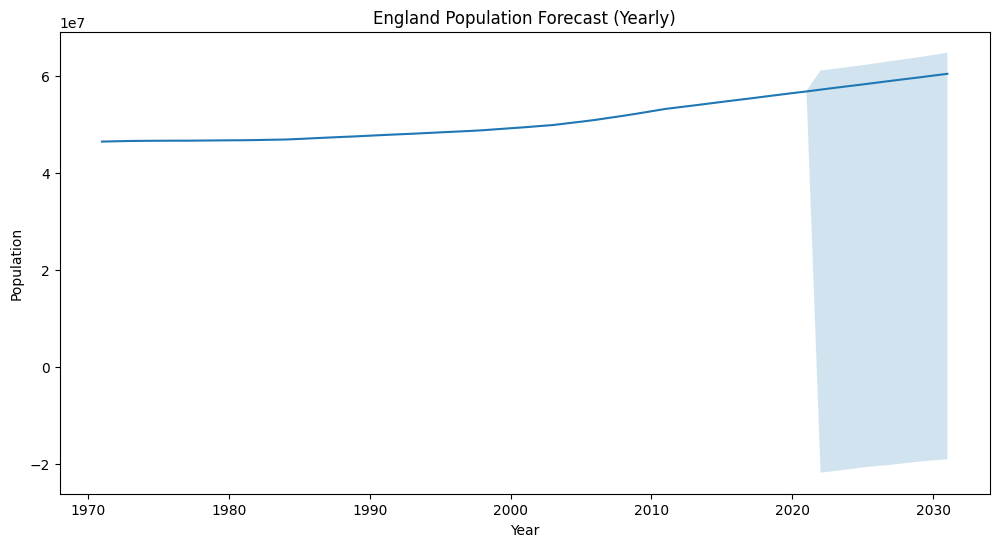

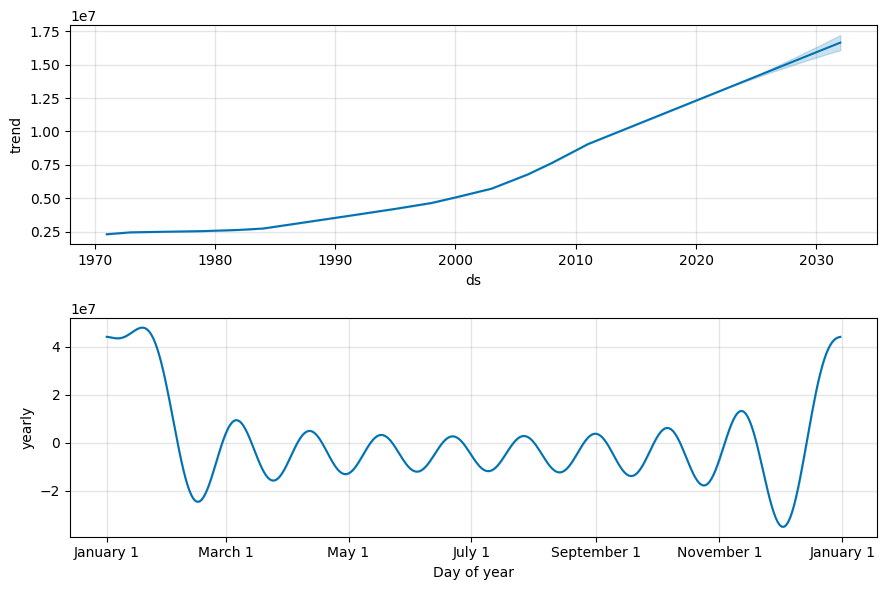

In [15]:
#Plot the next 10 years population forecast for England
plt.figure(figsize=(12, 6))
plt.plot(yearly_forecast_England['Year'], yearly_forecast_England['England_Predicted_Population'])
plt.fill_between(yearly_forecast_England['Year'], yearly_forecast_England['Lower_Bound'], yearly_forecast_England['Upper_Bound'], alpha=0.2)
plt.title('England Population Forecast (Yearly)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.show()
#Plot components
fig_components = model_England.plot_components(forecast_England)
plt.show()

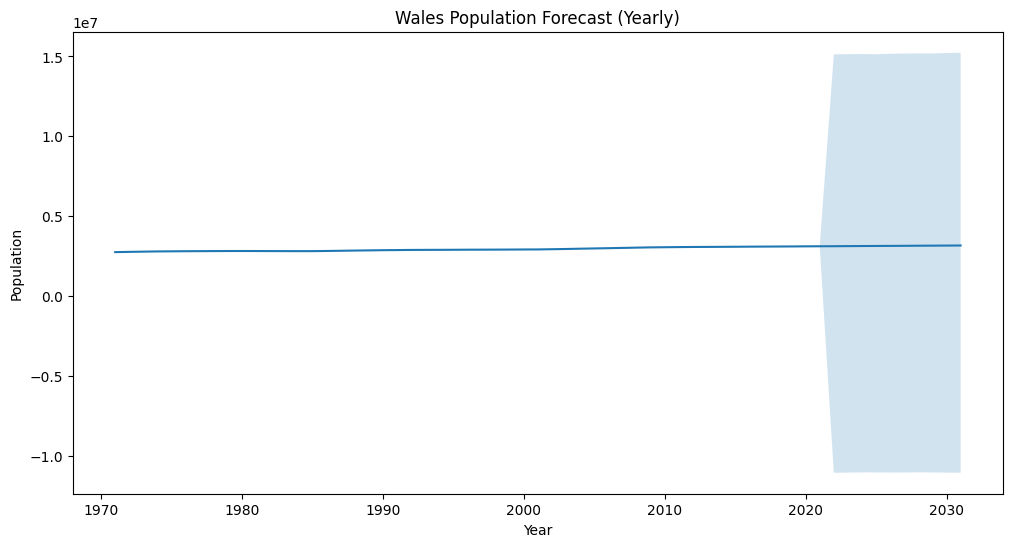

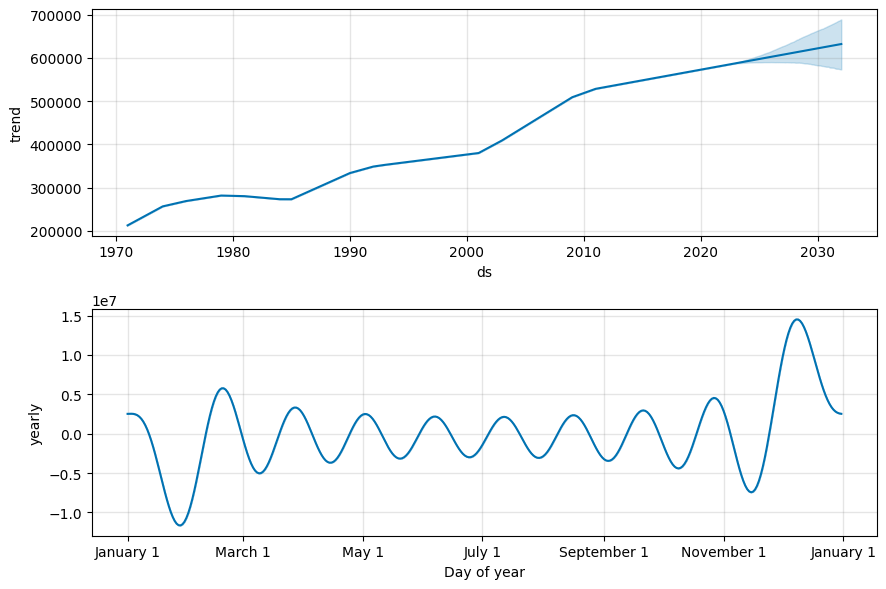

In [16]:
#Plot the next 10 years population forecast for Wales
plt.figure(figsize=(12, 6))
plt.plot(yearly_forecast_Wales['Year'], yearly_forecast_Wales['Wales_Predicted_Population'])
plt.fill_between(yearly_forecast_Wales['Year'], yearly_forecast_Wales['Lower_Bound'], yearly_forecast_Wales['Upper_Bound'], alpha=0.2)
plt.title('Wales Population Forecast (Yearly)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.show()
#Plot components
fig_components = model_Wales.plot_components(forecast_Wales)
plt.show()

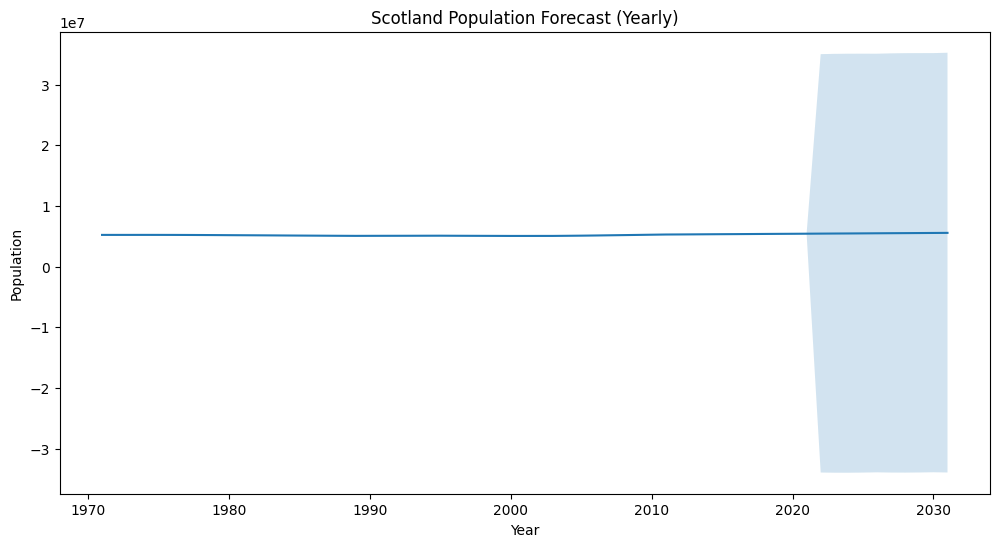

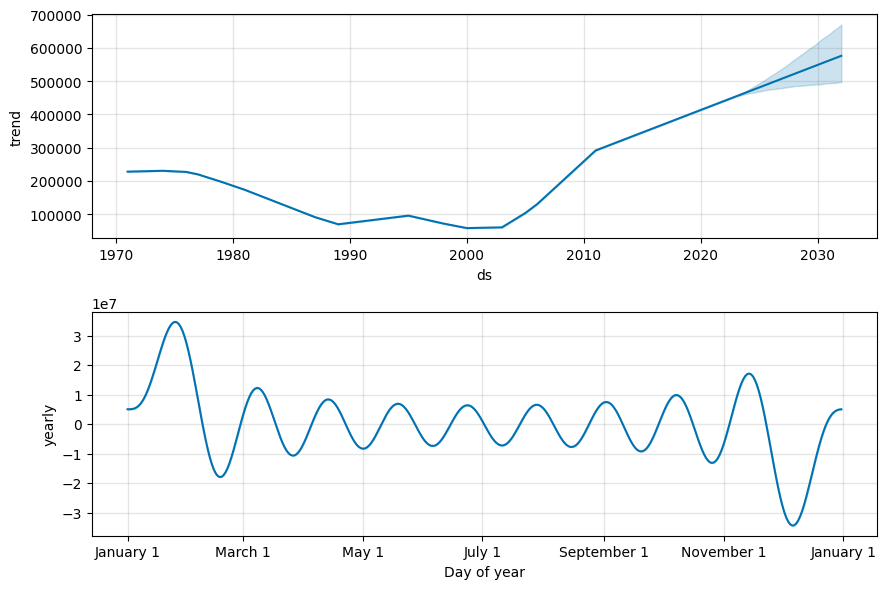

In [17]:
#Plot the next 10 years population forecast for Scotland
plt.figure(figsize=(12, 6))
plt.plot(yearly_forecast_Scotland['Year'], yearly_forecast_Scotland['Scotland_Predicted_Population'])
plt.fill_between(yearly_forecast_Scotland['Year'], yearly_forecast_Scotland['Lower_Bound'], yearly_forecast_Scotland['Upper_Bound'], alpha=0.2)
plt.title('Scotland Population Forecast (Yearly)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.show()
#Plot components
fig_components = model_Scotland.plot_components(forecast_Scotland)
plt.show()

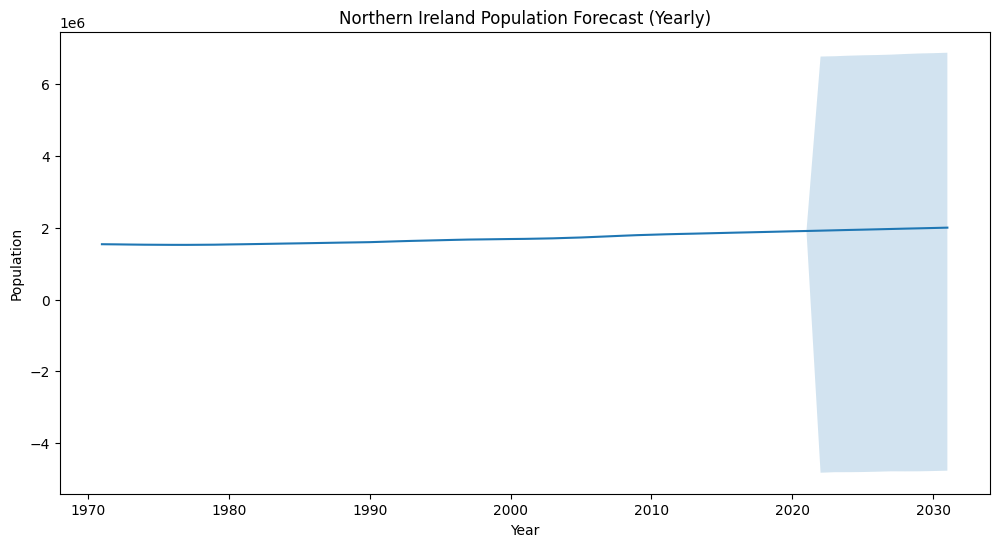

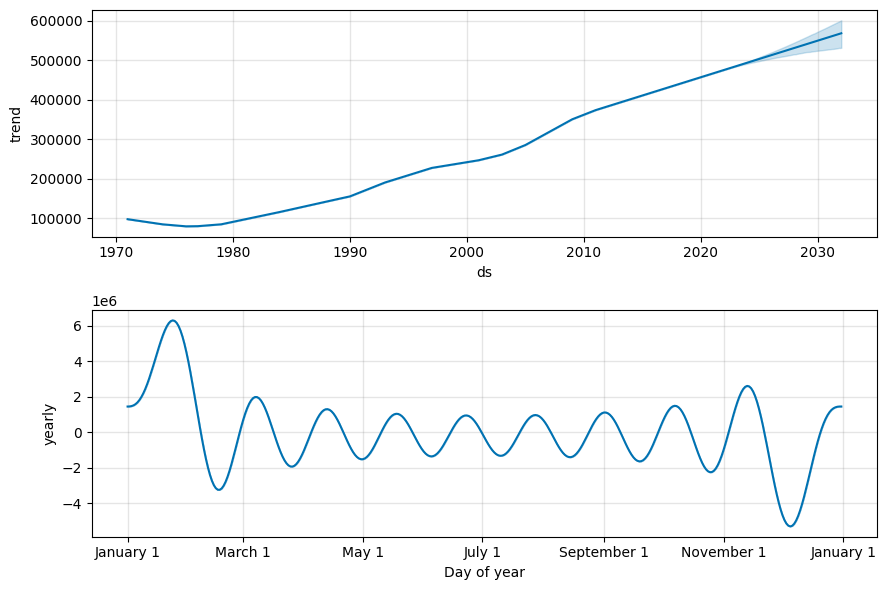

In [18]:
#Plot the next 10 years population forecast for Northern Ireland
plt.figure(figsize=(12, 6))
plt.plot(yearly_forecast_NI['Year'], yearly_forecast_NI['Northern_Ireland_Predicted_Population'])
plt.fill_between(yearly_forecast_NI['Year'], yearly_forecast_NI['Lower_Bound'], yearly_forecast_NI['Upper_Bound'], alpha=0.2)
plt.title('Northern Ireland Population Forecast (Yearly)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.show()
#Plot components
fig_components = model_NI.plot_components(forecast_NI)
plt.show()